In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sounddevice as sd
import pandas as pd
from scipy import signal
from scipy.io.wavfile import write
from scipy.fftpack import fft, fftfreq, ifft

<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\h'
<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\h'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19476\3071446223.py:21: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$\omega$ (cycles/s)")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19476\3071446223.py:22: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$|\hat{y}|$")


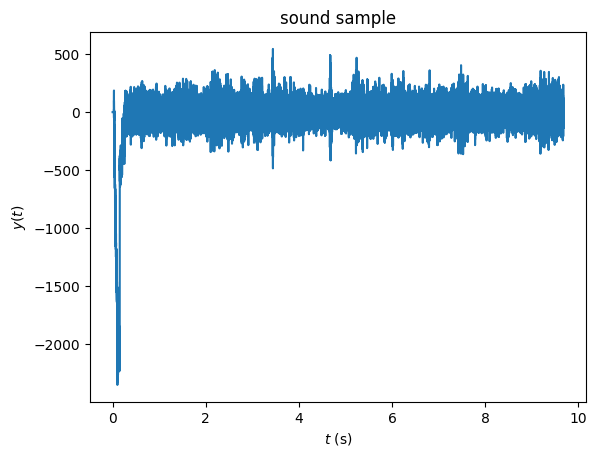

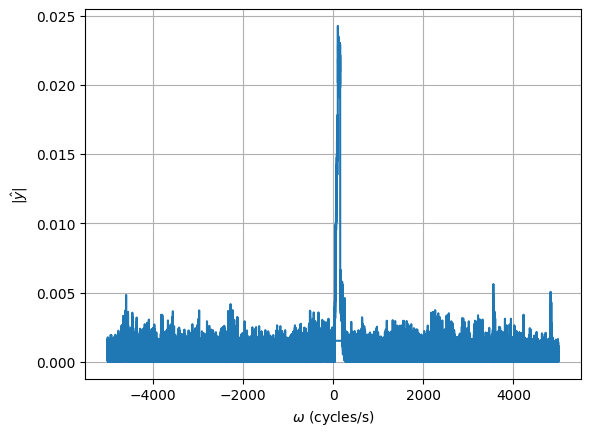

In [2]:
y = pd.read_csv("sound_samples_noiseonly.csv")

samplingFreq = 10000 # sampled at 10 kHz frequency = 10000 sample/s
tlims = [0,10]       # time duration in second (s)
time = np.linspace(tlims[0],tlims[1],(tlims[1]-tlims[0])*samplingFreq)

# compute spectrum
yhat=fft(y)
fcycles=fftfreq(len(y),1/samplingFreq)

# plot sound signals
plt.figure()
plt.plot(time[:len(y)], y)
plt.title("sound sample")
plt.ylabel("$y(t)$")
plt.xlabel("$t$ (s)")

# plot fft result
plt.figure()
plt.plot(fcycles,np.absolute(yhat)/len(y))
plt.xlabel("$\omega$ (cycles/s)")
plt.ylabel("$|\hat{y}|$")
plt.grid()

Text(0.5, 0, '$t$ (s)')

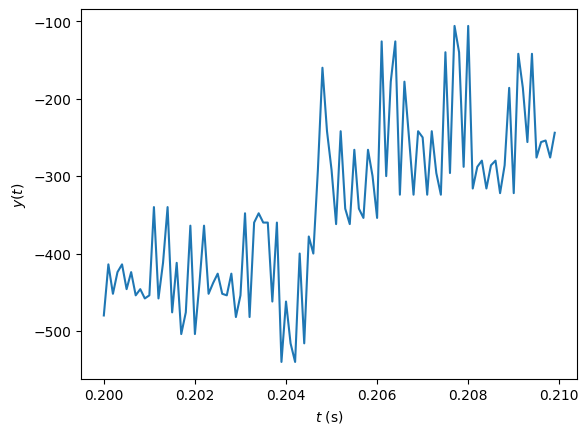

In [3]:
# Plot signal in time domain
plt.figure()
plt.plot(time[2000:2100],y[2000:2100])
plt.ylabel("$y(t)$")
plt.xlabel("$t$ (s)")

In [4]:
# Butterworth filter
wc = 2*np.pi*4900; # Frekuensi cut-off (rad/s), dimana fc = 4900 Hz
n = 2;          # n= Orde Filter

# Hituung Koefisien Butterworth filter
a = np.zeros(n+1)
gamma = np.pi/(2.0*n)
a[0] = 1; # Koef. pertama selalu 1
for k in range(0,n):
    rfac = np.cos(k*gamma)/np.sin((k+1)*gamma)
    a[k+1] = rfac*a[k]; # Koef. Rekursif lain

print("Koef. Polinomial Butterworth (a_i):                              " + str(a))

# Adjust the cutoff frequency
c = np.zeros(n+1)
for k in range(0,n+1):
    c[n-k] = a[k]/pow(wc,k)

print("Koef. Polinomial Butterworth dengan Penyesuaian frekuensi (c_i): " + str(c))

Koef. Polinomial Butterworth (a_i):                              [1.         1.41421356 1.        ]
Koef. Polinomial Butterworth dengan Penyesuaian frekuensi (c_i): [1.05498942e-09 4.59345059e-05 1.00000000e+00]


In [5]:
# Low-pass filter
w0 = 2*np.pi*4900; # frekuensi cut-off (rad/s), frekuensi cut-off dipilih 4900 Hz
num = [1];      # koefisien pembilang (numerator) dari fungsi alih
den = c;        # koefisien penyebut (denominator) dari fungsi alih
lowPass = signal.TransferFunction(num,den) # Generate fungsi alih


In [6]:
# # Mengubah Fungsi alih analog menjadi Fungsi alih diskrit dengan delta_t = 1/samplingFrequency
dt = 1.0/samplingFreq
discreteLowPass = lowPass.to_discrete(dt,method='gbt',alpha=0.5)
print(discreteLowPass)

TransferFunctionDiscrete(
array([0.4272252, 0.8544504, 0.4272252]),
array([1.        , 0.49387595, 0.21502486]),
dt: 0.0001
)


In [9]:
y = y.to_numpy()  # Convert to a NumPy array

Filter coefficients b_i: [0.4272252 0.8544504 0.4272252]
Filter coefficients a_i: [-0.49387595 -0.21502486]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19476\2477478650.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yfilt[m] = b[0]*y[m]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19476\2477478650.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yfilt[m] += a[i]*yfilt[m-i] + b[i]*y[m-i]


Text(0, 0.5, '$y(t)$')

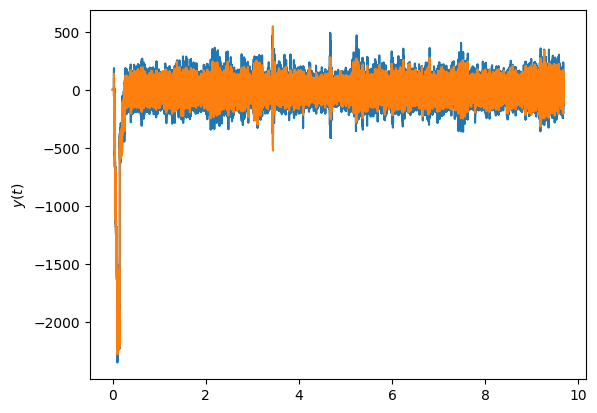

In [10]:
# Panggil koefisien Filter dari Fungsi alih diskrit sebelumnya (dengan negative sign)
b = discreteLowPass.num
a = -discreteLowPass.den
print("Filter coefficients b_i: " + str(b))
print("Filter coefficients a_i: " + str(a[1:]))

# Implementasi Filter Sinyal Menggunakan Persamaan Beda
Nb = len(b)
yfilt = np.zeros(len(y))
for m in range(3,len(y)):
    yfilt[m] = b[0]*y[m]
    for i in range(1,Nb):
        yfilt[m] += a[i]*yfilt[m-i] + b[i]*y[m-i]

# Plot Sinyal Input x(n) dan Output terfilter y(n)
plt.figure()
plt.plot(time[:len(y)],y)
plt.plot(time[:len(yfilt)],yfilt)
plt.ylabel("$y(t)$")